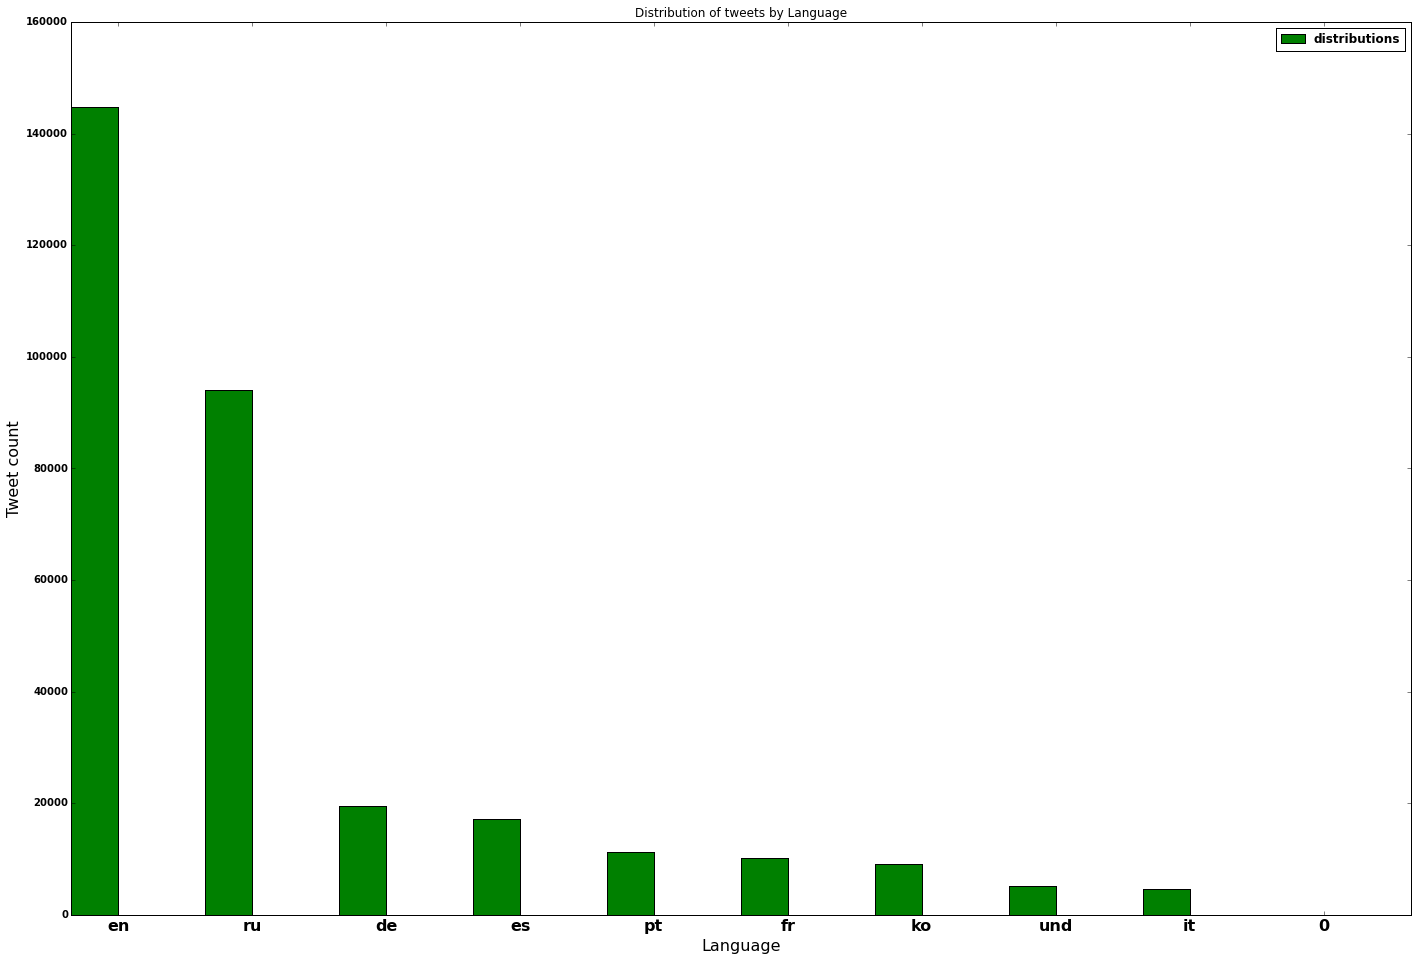

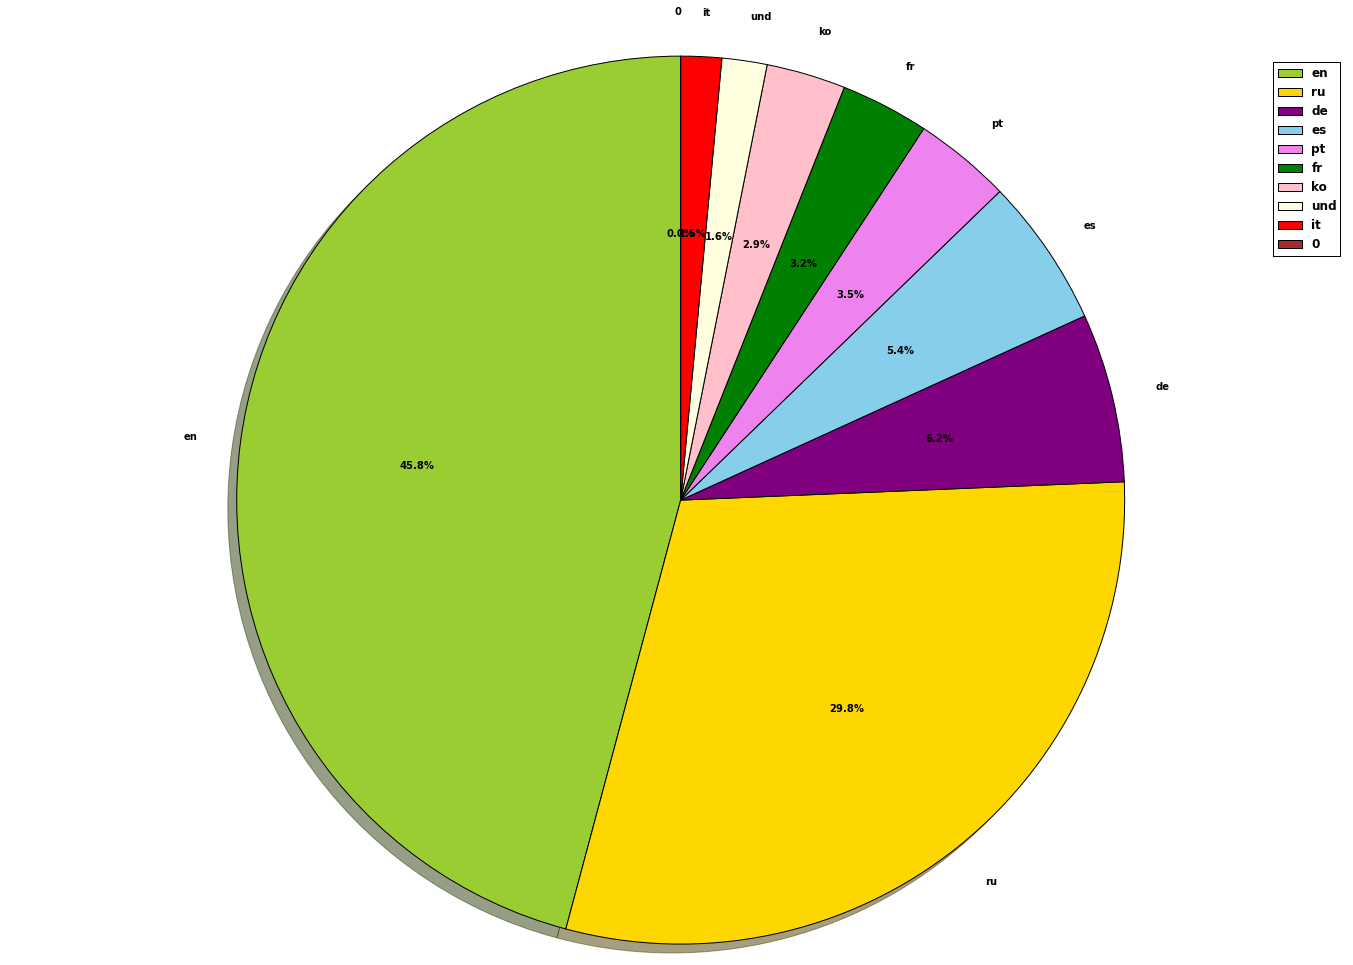

In [14]:
# Import SQLContext and data types
from pyspark.sql import SQLContext
from pyspark.sql.types import *
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt 
# sc is an existing SparkContext.
sqlContext = SQLContext(sc)
     
parquetFile = sqlContext.read.parquet("swift://notebooks.spark/TweetsPerLang.parquet")
#print parquetFile

parquetFile.registerTempTable("tweetsperlang");
sqlContext.cacheTable("tweetsperlang")
tweets = sqlContext.sql("SELECT * FROM tweetsperlang order by totTweets desc LIMIT 10")
resultCount = tweets.count()
tweets.cache()
#print resultCount
#tweets.collect()
countList = [0] * resultCount
for i in range(0, resultCount-1):
    countList[i] = sqlContext.sql("select totTweets as totTweets from tweetsperlang order by totTweets desc LIMIT 10").collect()[i].totTweets
#print countList
#totRecords = sqlContext.sql("select count(1) as totRecords from tweetsperlang").collect()[0].totRecords
totRecords = 10
#print totRecords
ind=np.arange(totRecords)
width = 0.35
#font = {'family' : 'normal',
 #       'weight' : 'bold',
#        'size'   : 22}

#matplotlib.rc('font', **font)
fig = plt.figure()
#plt.bar(ind, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41], width, color='g', label = "distributions")
plt.bar(ind, countList, width, color='g', label = "distributions")
langList = [0] * resultCount
for i in range(0, resultCount-1):
    langList[i] = sqlContext.sql("select TWEET_LANG as tweetLang from tweetsperlang order by totTweets desc LIMIT 10").collect()[i].tweetLang
#langDF.collect()
#langList = list(langDF.values.flatten())
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0]*4, plSize[1]*4) )
plt.ylabel('Tweet count', fontsize=16)
plt.xlabel('Language', fontsize=16)
plt.title('Distribution of tweets by Language')
plt.xticks(ind+width, langList, fontsize=16)
plt.legend()
 
plt.show()

colorArray = ['yellowgreen', 'gold', 'purple', 'skyblue', "violet", "green", "pink", "lightyellow", "red","brown"]
f = plt.figure()
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches((plSize[0]*4, plSize[1]*4))
plt.pie(countList, labels=langList, colors=colorArray, autopct='%1.1f%%', shadow=True, startangle=90)
plt.legend(langList, loc='best', fontsize=12)
plt.axis('equal')
plt.show()

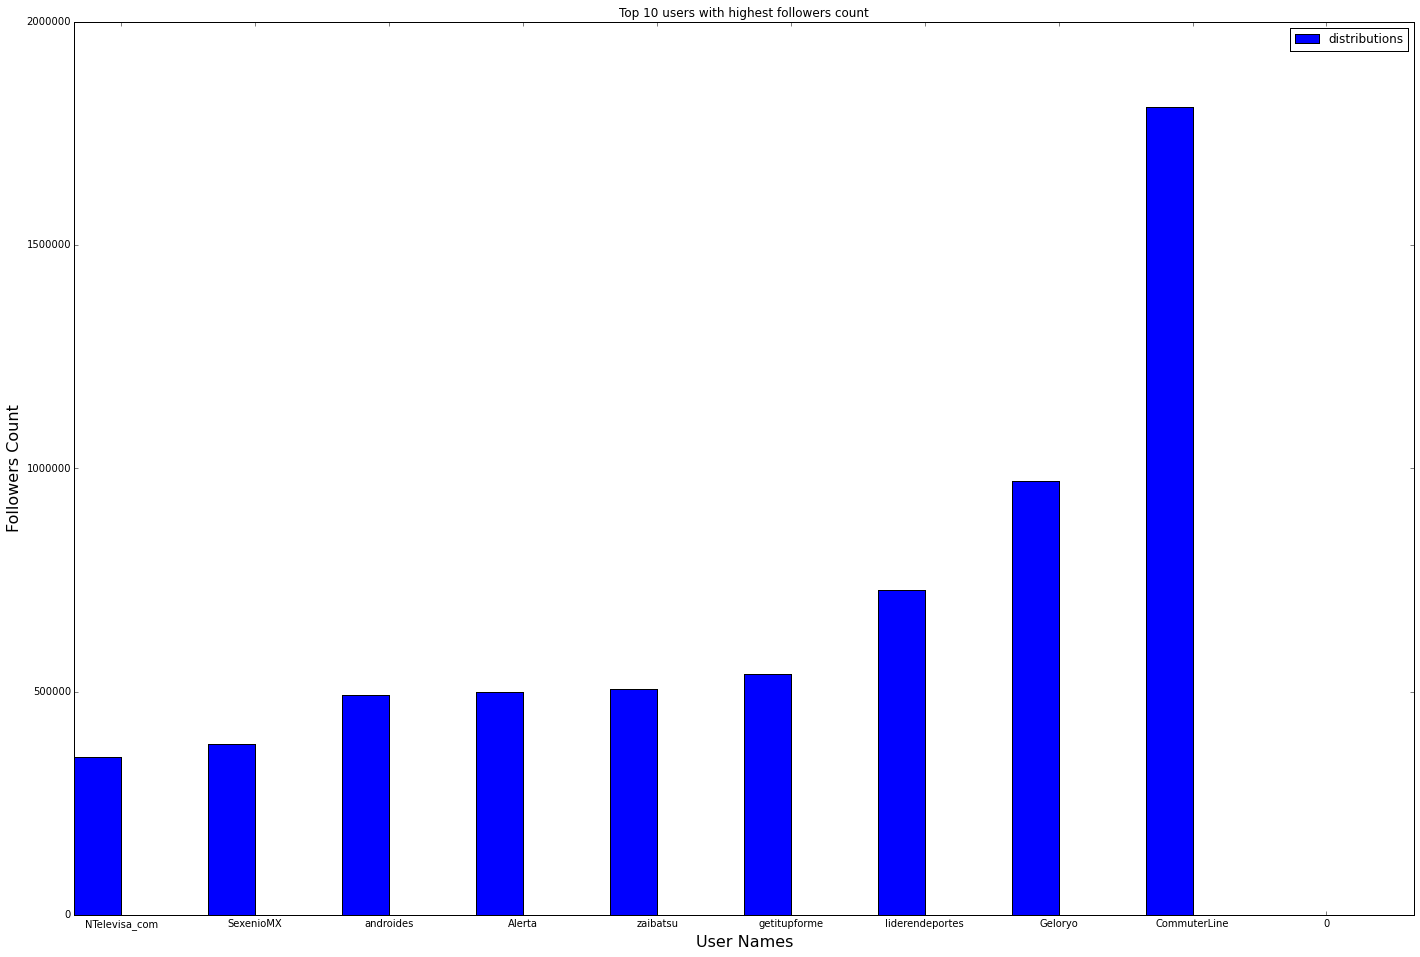

In [1]:
# Import SQLContext and data types
from pyspark.sql import SQLContext
from pyspark.sql.types import *
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt 
# sc is an existing SparkContext.
sqlContext = SQLContext(sc)
     
parquetFile = sqlContext.read.parquet("swift://notebooks.spark/Top10UsersWithFollowers.parquet")
#print parquetFile
     
parquetFile.registerTempTable("FCountPerUser");
sqlContext.cacheTable("FCountPerUser")
tweets = sqlContext.sql("SELECT * FROM FCountPerUser order by TWEET_USER_FOLLOWERS_COUNT desc")
resultCount = tweets.count()
tweets.cache()
#print resultCount
#tweets.collect()
FCountList = [0] * resultCount
for i in range(0, resultCount-1):
    FCountList[i] = sqlContext.sql("select TWEET_USER_FOLLOWERS_COUNT as followersCount from FCountPerUser order by followersCount").collect()[i].followersCount
#print FCountList
UsersList = [0] * resultCount
for i in range(0, resultCount-1):
    UsersList[i] = sqlContext.sql("select TWEET_USER_SCREEN_NAME as UserName from FCountPerUser").collect()[i].UserName
#totRecords = sqlContext.sql("select count(1) as totRecords from tweetsperlang").collect()[0].totRecords
totRecords = 10
#print totRecords
ind=np.arange(totRecords)
width = 0.35
fig = plt.figure()
plt.bar(ind, FCountList, width, color='b', label = "distributions")
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0]*4, plSize[1]*4) )
plt.ylabel('Followers Count', fontsize=16)
plt.xlabel('User Names', fontsize=16)
plt.title('Top 10 users with highest followers count')
plt.xticks(ind+width, UsersList)
plt.legend(fontsize=12)
 
plt.show()

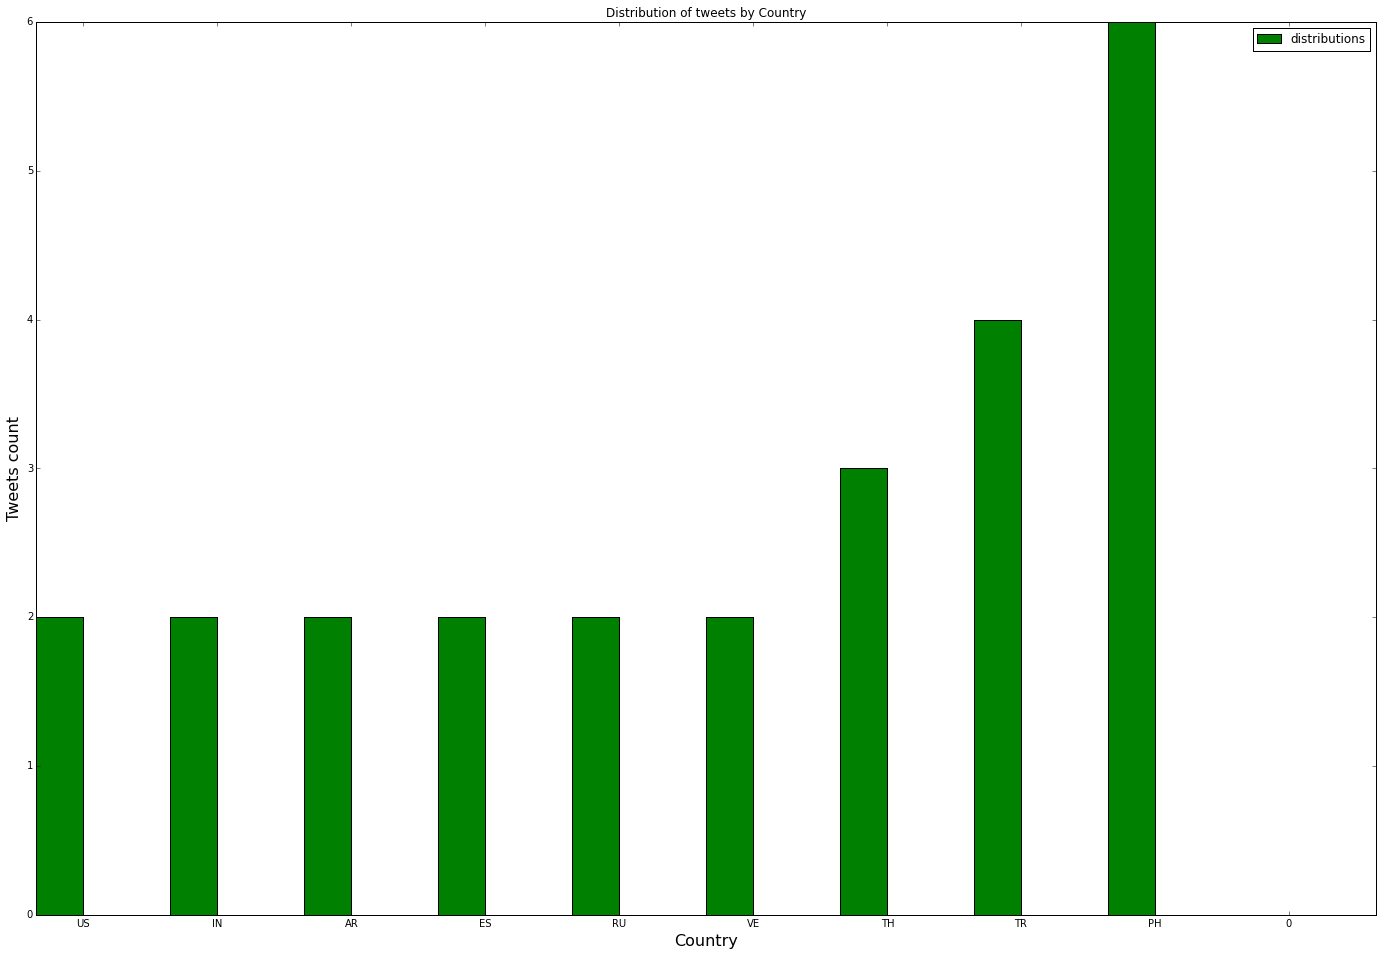

In [2]:
from pyspark.sql import SQLContext
from pyspark.sql.types import *
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt 
# sc is an existing SparkContext.
sqlContext = SQLContext(sc)
     
parquetFile = sqlContext.read.parquet("swift://notebooks.spark/Top10CountriesList.parquet")
#print parquetFile
     
parquetFile.registerTempTable("TweetsPerCountry");
sqlContext.cacheTable("TweetsPerCountry")
tweets = sqlContext.sql("SELECT * FROM TweetsPerCountry order by TWEETS_PER_COUNTRY desc")
resultCount = tweets.count()
tweets.cache()
#print resultCount
#tweets.collect()
TCountList = [0] * resultCount
for i in range(0, resultCount-1):
    TCountList[i] = sqlContext.sql("select TWEETS_PER_COUNTRY as tweetsCount from TweetsPerCountry order by TWEETS_PER_COUNTRY").collect()[i].tweetsCount
#print TCountList
CountryList = [0] * resultCount
for i in range(0, resultCount-1):
    CountryList[i] = sqlContext.sql("select TWEET_PLACE_COUNTRY_CODE as countryName from TweetsPerCountry").collect()[i].countryName
#totRecords = sqlContext.sql("select count(1) as totRecords from tweetsperlang").collect()[0].totRecords
totRecords = 10
#print totRecords
ind=np.arange(totRecords)
width = 0.35
fig = plt.figure()
plt.bar(ind, TCountList, width, color='g', label = "distributions")
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0]*4, plSize[1]*4) )
plt.ylabel('Tweets count', fontsize=16)
plt.xlabel('Country', fontsize=16)
plt.title('Distribution of tweets by Country')
plt.xticks(ind+width, CountryList)
plt.legend(fontsize=12)
 
plt.show()

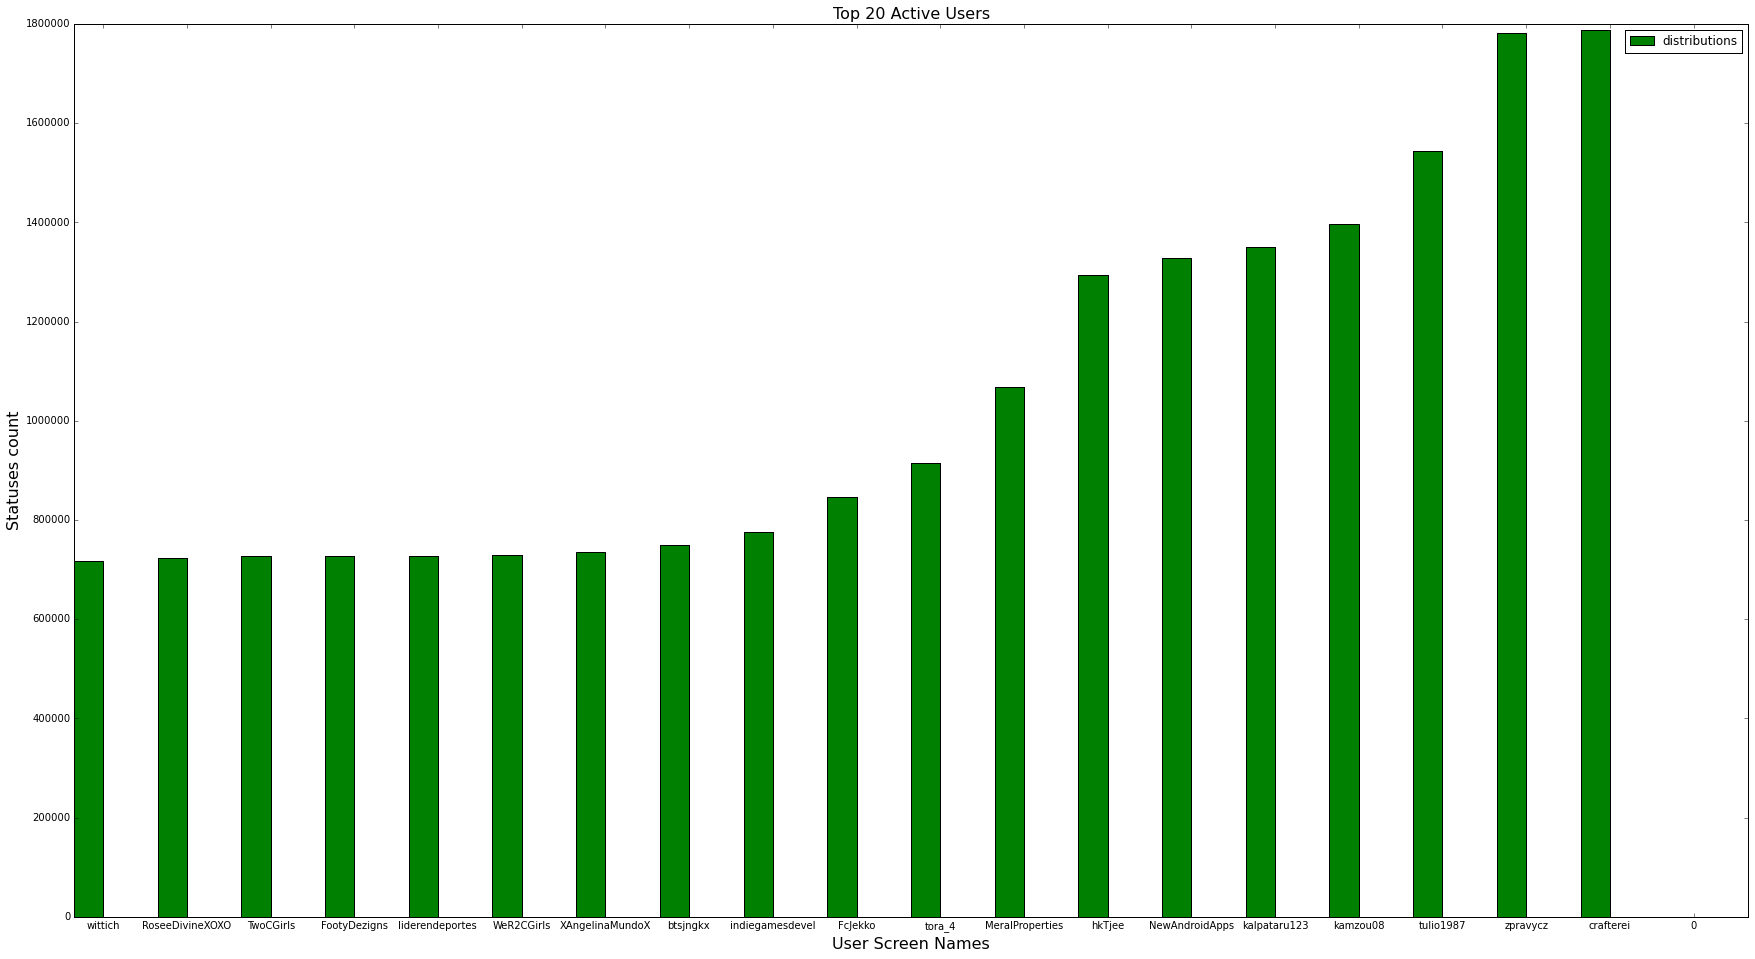

In [3]:
# Import SQLContext and data types
from pyspark.sql import SQLContext
from pyspark.sql.types import *
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt 
# sc is an existing SparkContext.
sqlContext = SQLContext(sc)
     
parquetFile = sqlContext.read.parquet("swift://notebooks.spark/Top20ActiveUsersList.parquet")
#print parquetFile
     
parquetFile.registerTempTable("UserStatus");
sqlContext.cacheTable("UserStatus")
tweets = sqlContext.sql("SELECT * FROM UserStatus order by TWEET_USER_STATUSES_COUNT desc")
resultCount = tweets.count()
tweets.cache()
#print resultCount
#tweets.collect()
SCountList = [0] * resultCount
for i in range(0, resultCount-1):
    SCountList[i] = sqlContext.sql("select TWEET_USER_STATUSES_COUNT as statusCount from UserStatus order by TWEET_USER_STATUSES_COUNT").collect()[i].statusCount
#print TCountList
UserList = [0] * resultCount
for i in range(0, resultCount-1):
    UserList[i] = sqlContext.sql("select TWEET_USER_SCREEN_NAME as userName from UserStatus  order by TWEET_USER_STATUSES_COUNT").collect()[i].userName
#totRecords = sqlContext.sql("select count(1) as totRecords from tweetsperlang").collect()[0].totRecords
totRecords = 20
#print totRecords
ind=np.arange(totRecords)
width = 0.35
fig = plt.figure()
plt.bar(ind, SCountList, width, color='g', label = "distributions")
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0]*5, plSize[1]*4) )
plt.ylabel('Statuses count', fontsize=16)
plt.xlabel('User Screen Names', fontsize=16)
plt.title('Top 20 Active Users', fontsize=16)
plt.xticks(ind+width, UserList)
plt.legend(fontsize=12)
 
plt.show()

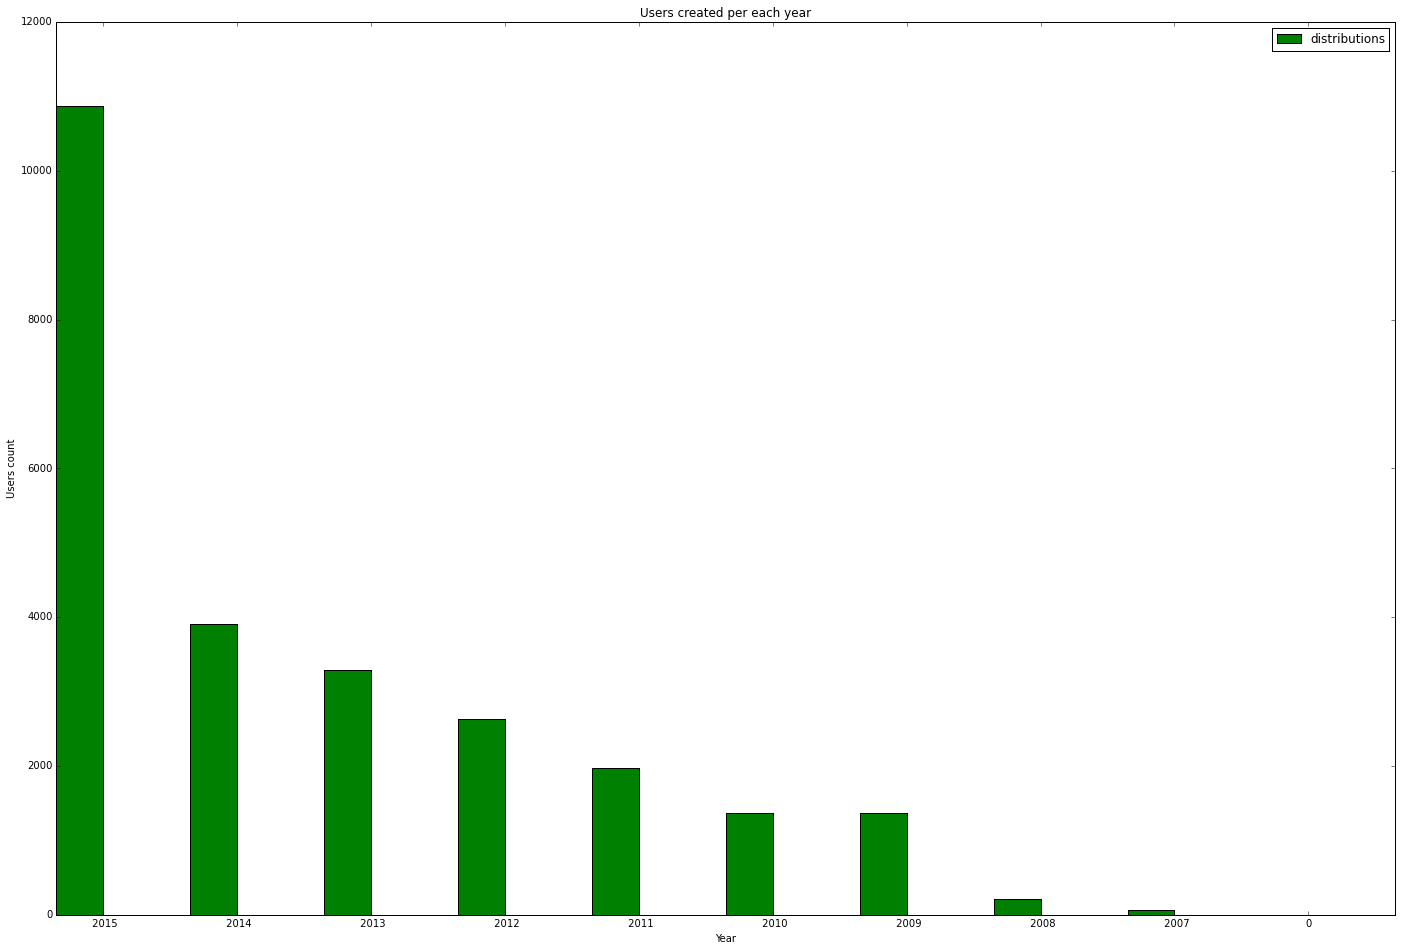

In [9]:
# Import SQLContext and data types
from pyspark.sql import SQLContext
from pyspark.sql.types import *
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt 
# sc is an existing SparkContext.
sqlContext = SQLContext(sc)
     
parquetFile = sqlContext.read.parquet("swift://notebooks.spark/UserPerYear.parquet")
#print parquetFile
     
parquetFile.registerTempTable("UsersPerYear");
sqlContext.cacheTable("UsersPerYear")
tweets = sqlContext.sql("SELECT * FROM UsersPerYear order by CNT desc")
resultCount = tweets.count()
tweets.cache()
#print resultCount
#tweets.collect()
userCountList = [0] * resultCount
for i in range(0, resultCount-1):
    userCountList[i] = sqlContext.sql("select CNT as userCount from UsersPerYear order by CNT desc").collect()[i].userCount
#print userCountList
yearList = [0] * resultCount
for i in range(0, resultCount-1):
    yearList[i] = sqlContext.sql("select YR as yer from UsersPerYear  order by CNT desc").collect()[i].yer
#totRecords = sqlContext.sql("select count(1) as totRecords from tweetsperlang").collect()[0].totRecords
ind=np.arange(len(yearList))
width = 0.35
fig = plt.figure()
plt.bar(ind, userCountList, width, color='g', label = "distributions")
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0]*4, plSize[1]*4) )
plt.ylabel('Users count', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.title('Users created per each year', fontsize=16)
plt.xticks(ind+width, yearList)
plt.legend(fontsize=12)
 
plt.show()

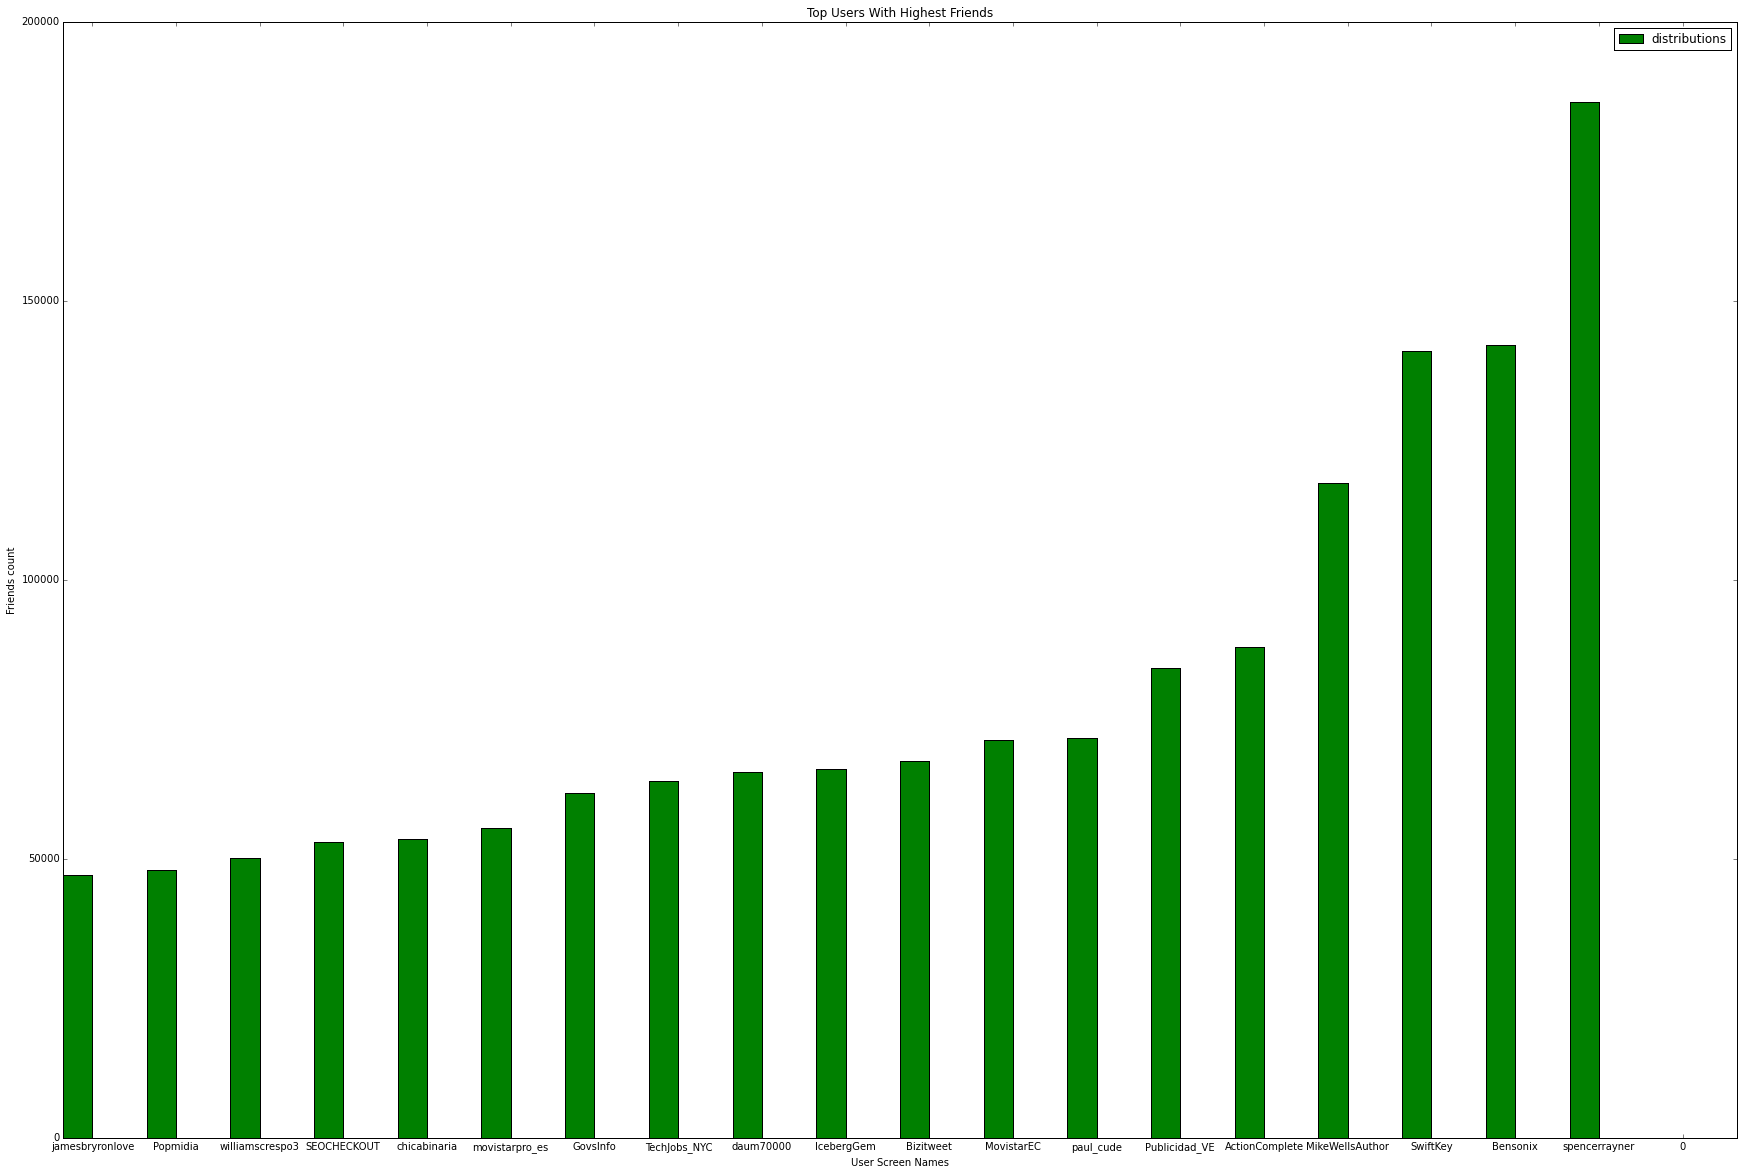

In [10]:
# Import SQLContext and data types
from pyspark.sql import SQLContext
from pyspark.sql.types import *
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt 
# sc is an existing SparkContext.
sqlContext = SQLContext(sc)
     
parquetFile = sqlContext.read.parquet("swift://notebooks.spark/TopUsersWithFriends.parquet")
#print parquetFile
     
parquetFile.registerTempTable("UserStatus");
sqlContext.cacheTable("UserStatus")
tweets = sqlContext.sql("SELECT * FROM UserStatus order by FRIENDS_COUNT desc")
resultCount = tweets.count()
tweets.cache()
#print resultCount
SCountList = [0] * resultCount
for i in range(0, resultCount-1):
    SCountList[i] = sqlContext.sql("select FRIENDS_COUNT as statusCount from UserStatus order by FRIENDS_COUNT").collect()[i].statusCount
#print TCountList
UserList = [0] * resultCount
for i in range(0, resultCount-1):
    UserList[i] = sqlContext.sql("select TWEET_USER_SCREEN_NAME as userName from UserStatus  order by FRIENDS_COUNT").collect()[i].userName
#totRecords = sqlContext.sql("select count(1) as totRecords from tweetsperlang").collect()[0].totRecords
totRecords = 20
#print totRecords
ind=np.arange(len(UserList))
width = 0.35
fig = plt.figure()
plt.bar(ind, SCountList, width, color='g', label = "distributions")
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0]*5, plSize[1]*5) )
plt.ylabel('Friends count', fontsize=16)
plt.xlabel('User Screen Names', fontsize=16)
plt.title('Top Users With Highest Friends', fontsize=16)
plt.xticks(ind+width, UserList)
plt.legend(fontsize=12)
 
plt.show()

20
[-1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
20


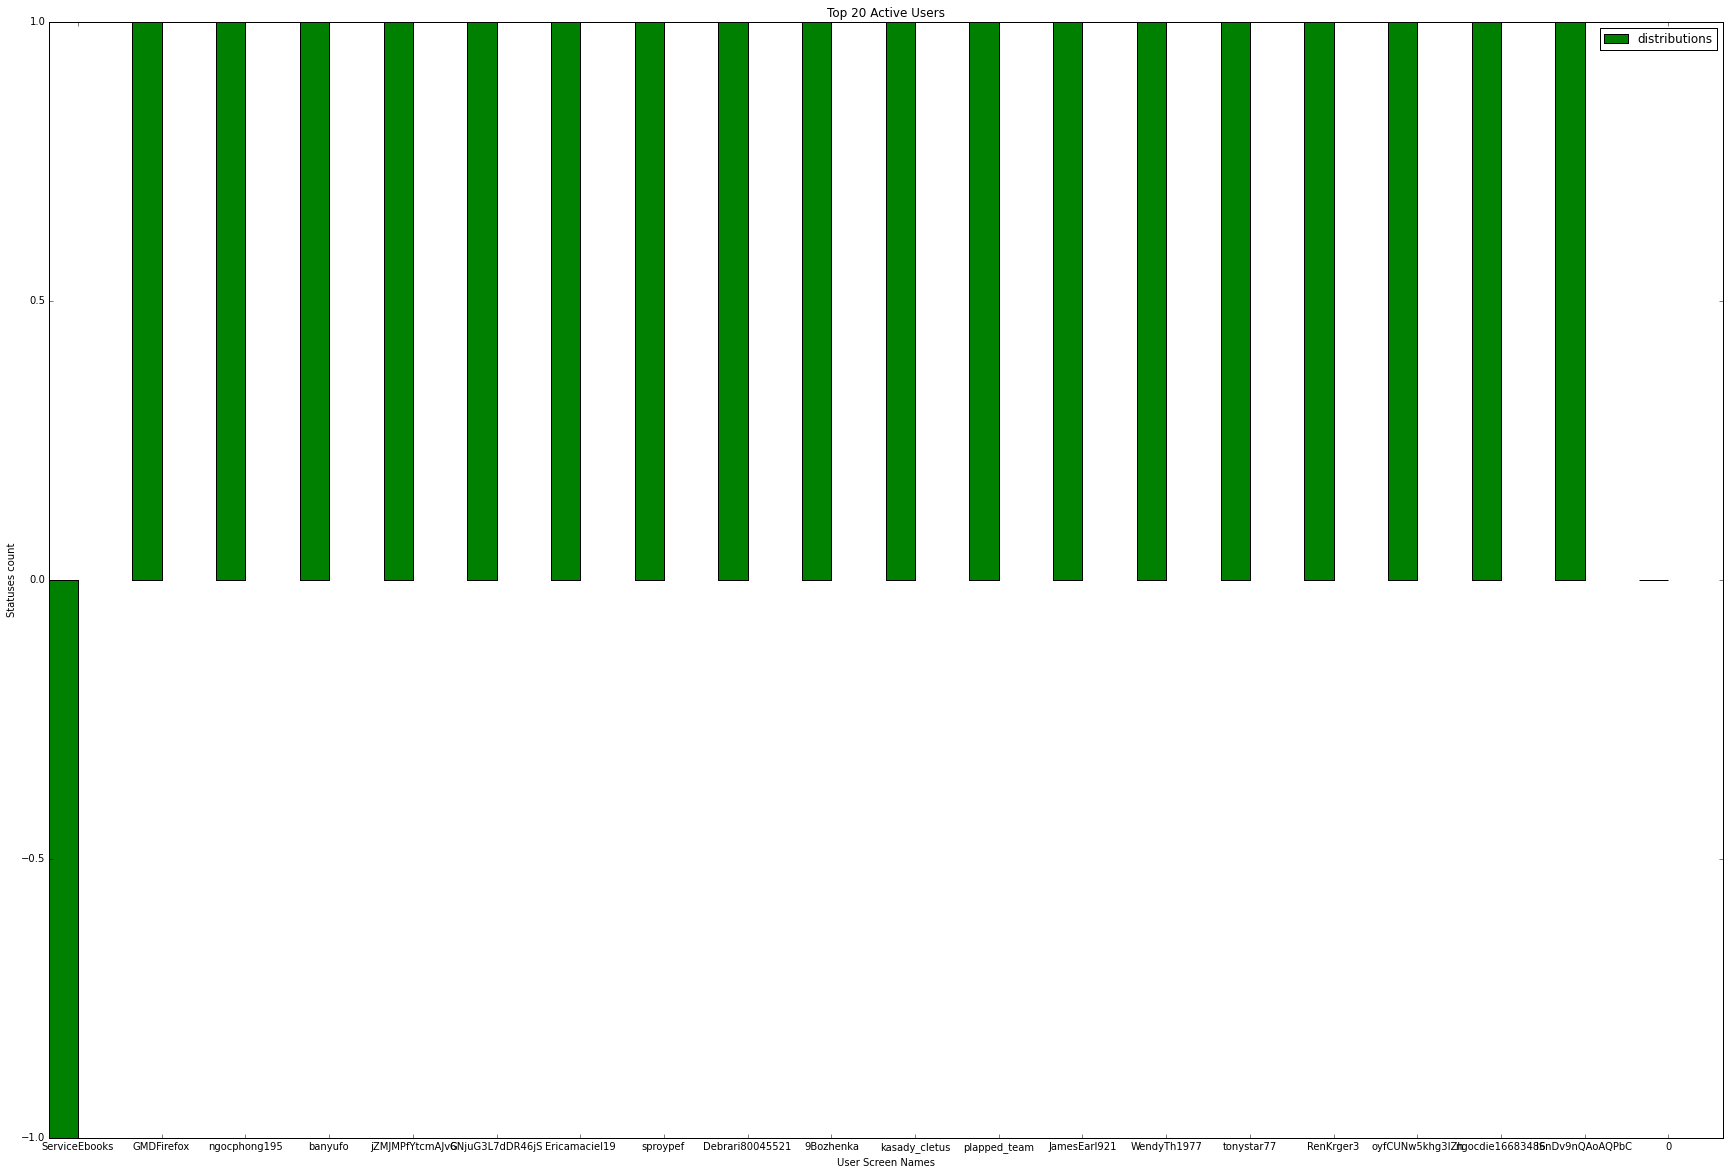

In [3]:
# Import SQLContext and data types
from pyspark.sql import SQLContext
from pyspark.sql.types import *
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt 
# sc is an existing SparkContext.
sqlContext = SQLContext(sc)
     
parquetFile = sqlContext.read.parquet("swift://notebooks.spark/TopUsersWithFriends5.parquet")
#print parquetFile
     
parquetFile.registerTempTable("UserStatus");
sqlContext.cacheTable("UserStatus")
tweets = sqlContext.sql("SELECT * FROM UserStatus order by TWEET_USER_STATUSES_COUNT")
resultCount = tweets.count()
tweets.cache()
print resultCount
#tweets.collect()
SCountList = [0] * resultCount
for i in range(0, resultCount-1):
    SCountList[i] = sqlContext.sql("select TWEET_USER_STATUSES_COUNT as statusCount from UserStatus order by TWEET_USER_STATUSES_COUNT").collect()[i].statusCount
print SCountList
UserList = [0] * resultCount
for i in range(0, resultCount-1):
    UserList[i] = sqlContext.sql("select TWEET_USER_SCREEN_NAME as userName from UserStatus  order by TWEET_USER_STATUSES_COUNT").collect()[i].userName
#totRecords = sqlContext.sql("select count(1) as totRecords from tweetsperlang").collect()[0].totRecords
totRecords = 20
print totRecords
ind=np.arange(totRecords)
width = 0.35
fig = plt.figure()
plt.bar(ind, SCountList, width, color='g', label = "distributions")
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0]*5, plSize[1]*5) )
plt.ylabel('Statuses count', fontsize=16)
plt.xlabel('User Screen Names', fontsize=16)
plt.title('Top 20 Active Users', fontsize=16)
plt.xticks(ind+width, UserList)
plt.legend(fontsize=12)
 
plt.show()